[View in Colaboratory](https://colab.research.google.com/github/stanimman/Simple/blob/master/Mura_Clahe_Elbow.ipynb)

<img height="60px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="20px" vspace="5px">

## Welcome to Colaboratory!

Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud. See our [FAQ](https://research.google.com/colaboratory/faq.html) for more info.

## Getting Started
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Loading and saving data: Local files, Drive, Sheets, Google Cloud Storage](/notebooks/io.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Using Google Cloud BigQuery](/notebooks/bigquery.ipynb)
- [Forms](/notebooks/forms.ipynb), [Charts](/notebooks/charts.ipynb), [Markdown](/notebooks/markdown_guide.ipynb), & [Widgets](/notebooks/widgets.ipynb)
- [TensorFlow with GPU](/notebooks/gpu.ipynb)
- [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/): [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb) & [First Steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)


## Highlighted Features
### Seedbank

Looking for Colab notebooks to learn from? Check out [Seedbank](https://tools.google.com/seedbank/), a place to discover interactive machine learning examples.

### TensorFlow execution

Colaboratory allows you to execute TensorFlow code in your browser with a single click. The example below adds two matrices.

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

In [1]:
!wget https://fs8.transfernow.net/download/5b7251e352ad5/master/XR_ELBOW_v1.1.zip

--2018-08-15 06:16:56--  https://fs8.transfernow.net/download/5b7251e352ad5/master/XR_ELBOW_v1.1.zip
Resolving fs8.transfernow.net (fs8.transfernow.net)... 163.172.21.23
Connecting to fs8.transfernow.net (fs8.transfernow.net)|163.172.21.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 446967685 (426M) [application/zip]
Saving to: ‘XR_ELBOW_v1.1.zip’

XR_ELBOW_v1.1.zip   100%[===================>] 426.26M  4.91MB/s    in 87s     

2018-08-15 06:18:24 (4.90 MB/s) - ‘XR_ELBOW_v1.1.zip’ saved [446967685/446967685]



In [3]:
!wget https://fs5.transfernow.net/download/5b73c4464b5cc/master/Image_Path.zip

--2018-08-15 06:21:30--  https://fs5.transfernow.net/download/5b73c4464b5cc/master/Image_Path.zip
Resolving fs5.transfernow.net (fs5.transfernow.net)... 62.210.248.133
Connecting to fs5.transfernow.net (fs5.transfernow.net)|62.210.248.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 372727 (364K) [application/zip]
Saving to: ‘Image_Path.zip’

Image_Path.zip      100%[===================>] 363.99K   668KB/s    in 0.5s    

2018-08-15 06:21:31 (668 KB/s) - ‘Image_Path.zip’ saved [372727/372727]



In [4]:
!unzip Image_Path

Archive:  Image_Path.zip
   creating: Image_Path/
  inflating: Image_Path/.DS_Store    
   creating: __MACOSX/Image_Path/
  inflating: __MACOSX/Image_Path/._.DS_Store  
  inflating: Image_Path/train_lmagepath_label.xlsx  
  inflating: __MACOSX/Image_Path/._train_lmagepath_label.xlsx  
  inflating: Image_Path/valid_imagepath_label.csv  
  inflating: __MACOSX/Image_Path/._valid_imagepath_label.csv  


In [0]:
%%capture
!unzip XR_ELBOW_v1.1.zip

In [0]:
rm -r __MACOSX

In [0]:
!ls 

datalab  __MACOSX  XR_ELBOW_v1.1  XR_ELBOW_v1.1.zip


In [7]:
!pip install xlrd

    100% |████████████████████████████████| 112kB 4.3MB/s 


In [0]:
import pandas as pd 
train_set = pd.read_excel('Image_Path/train_lmagepath_label.xlsx')
valid_set = pd.read_csv('Image_Path/valid_imagepath_label.csv')

In [2]:
#train_set.head()
valid_set.head()

,path,label_string,label
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,positive,1
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,positive,1
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,positive,1
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,positive,1
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,positive,1


In [23]:
print(train_set.paths.astype(str).str[16:24][0])
print(valid_set.path.astype(str).str[16:24][0])

XR_SHOUL
XR_WRIST


In [0]:
train_elbow = train_set.loc[train_set.paths.astype(str).str[16:24].isin(['XR_ELBOW'])]
valid_elbow = valid_set.loc[valid_set.path.astype(str).str[16:24].isin(['XR_ELBOW'])]

In [4]:
valid_elbow.shape

(465, 3)

In [6]:
valid_elbow.tail()

,path,label_string,label
2731,XR_ELBOW_v1.1/valid/XR_ELBOW/patient11205/stud...,negative,0
2732,XR_ELBOW_v1.1/valid/XR_ELBOW/patient11881/stud...,negative,0
2733,XR_ELBOW_v1.1/valid/XR_ELBOW/patient11881/stud...,negative,0
2734,XR_ELBOW_v1.1/valid/XR_ELBOW/patient11334/stud...,negative,0
2735,XR_ELBOW_v1.1/valid/XR_ELBOW/patient11334/stud...,negative,0


In [5]:
train_elbow['paths'] = train_elbow['paths'].str[0:9].replace(to_replace='MURA-v1.1',value='XR_ELBOW_v1.1'+train_elbow['paths'].str[9:])
valid_elbow['path'] = valid_elbow['path'].str[0:9].replace(to_replace='MURA-v1.1',value='XR_ELBOW_v1.1'+valid_elbow['path'].str[9:])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
train_set.shape

(13457, 2)

In [36]:
!pip uninstall Pillow -y

!pip install Pillow

Uninstalling Pillow-4.0.0:
  Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 2.0MB 9.5MB/s 


In [0]:
%%capture
!unzip MURA-v1.1.zip

In [7]:
import PIL
print(PIL.PILLOW_VERSION)
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

from torch.utils.data import DataLoader, Dataset
from torchvision.datasets.folder import pil_loader
from torchvision import transforms, utils
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, transform
import matplotlib.pyplot as plt
import os
from torchvision import  models
import torch.nn as nn
import torch.optim as optim
import copy
from torch.optim import lr_scheduler
import time
import datetime as dt
from PIL import Image
import cv2

5.2.0
tcmalloc: large alloc 1073750016 bytes == 0x5c51e000 @  0x7f440c0b61c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
0.4.0
True


In [0]:
%%capture
!unzip MURA-v1.1.zip


In [0]:
!ls

datalab  __MACOSX  MURA-v1.1  MURA-v1.1.zip


In [0]:
train_path_df = train_elbow
valid_path_df = valid_elbow

In [0]:
#image_list = train_path_df.iloc[1000:1015,0]
#im_path = image_list.iloc[2]

In [0]:
#im_path

In [0]:
#im = cv2.imread(im_path)

In [0]:
'''def channel_check(im):
  channel0 = im[:,:,0]
  channel1 = im[:,:,1]
  channel2 = im[:,:,2]
  diff = channel0 - channel1
  print(channel0.sum(),channel1.sum(),channel2.sum())
  print(diff.sum())'''

'def channel_check(im):\n  channel0 = im[:,:,0]\n  channel1 = im[:,:,1]\n  channel2 = im[:,:,2]\n  diff = channel0 - channel1\n  print(channel0.sum(),channel1.sum(),channel2.sum())\n  print(diff.sum())'

In [0]:
#diff = channel0 - channel1
#print(channel0.sum(),channel1.sum(),channel2.sum())
#print(diff.sum())

In [0]:
'''def refix(image_path) :
  desired_size = 512
  im_pth = image_path
  #img = cv2.imread(image_path,0)
  # create a CLAHE object (Arguments are optional).
  #clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  #img = clahe.apply(img)
  #im = np.stack((img,)*3, -1)
  im = cv2.imread(im_pth)
  #im = im_pth
  original_im = im
  old_size = im.shape[:2] # old_size is in (height, width) format

  ratio = float(desired_size)/max(old_size)
  new_size = tuple([int(x*ratio) for x in old_size])

  # new_size should be in (width, height) format

  im = cv2.resize(im, (new_size[1], new_size[0]))

  delta_w = desired_size - new_size[1]
  delta_h = desired_size - new_size[0]
  top, bottom = delta_h//2, delta_h-(delta_h//2)
  left, right = delta_w//2, delta_w-(delta_w//2)

  color = [0, 0, 0]
  new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
      value=color)
  return original_im, new_im'''

'def refix(image_path) :\n  desired_size = 512\n  im_pth = image_path\n  #img = cv2.imread(image_path,0)\n  # create a CLAHE object (Arguments are optional).\n  #clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))\n  #img = clahe.apply(img)\n  #im = np.stack((img,)*3, -1)\n  im = cv2.imread(im_pth)\n  #im = im_pth\n  original_im = im\n  old_size = im.shape[:2] # old_size is in (height, width) format\n\n  ratio = float(desired_size)/max(old_size)\n  new_size = tuple([int(x*ratio) for x in old_size])\n\n  # new_size should be in (width, height) format\n\n  im = cv2.resize(im, (new_size[1], new_size[0]))\n\n  delta_w = desired_size - new_size[1]\n  delta_h = desired_size - new_size[0]\n  top, bottom = delta_h//2, delta_h-(delta_h//2)\n  left, right = delta_w//2, delta_w-(delta_w//2)\n\n  color = [0, 0, 0]\n  new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,\n      value=color)\n  return original_im, new_im'

In [0]:
#x,y = refix(im_path)

In [0]:
#channel_check(y)

In [0]:
#img = cv2.imread(im_path,0)

In [0]:
#img.shape

In [0]:
#y.shape

In [0]:
#new_x = y[:,:,0]
#new_x.shape

In [0]:
'''def Clahe(img,ind):
  if ind == 0:
    img = cv2.imread(img,0)
  if ind == 1:
    img = img 
    # create a CLAHE object (Arguments are optional).
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  img = clahe.apply(img)
  image = np.stack((img,)*3, -1)
  return image
        '''

  

'def Clahe(img,ind):\n  if ind == 0:\n    img = cv2.imread(img,0)\n  if ind == 1:\n    img = img \n    # create a CLAHE object (Arguments are optional).\n  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))\n  img = clahe.apply(img)\n  image = np.stack((img,)*3, -1)\n  return image\n        '

In [0]:
#Clahe and then Refix
#Clahe_Image = Clahe(im_path,0)
#x,y = refix(Clahe_Image)
#im_to_see_1 = y

In [0]:
#channel_check(im_to_see_1)

In [0]:
#Refix and then Clahe
#x,y = refix(im_path)
#img_refix = y[:,:,0]
#Clahe_Image = Clahe(img_refix,1)
#im_to_see_2 = Clahe_Image

In [0]:
#Refix and then Clahe
#x,y = refix(im_path)
#img_refix = y[:,:,0]
#Clahe_Image = Clahe(img_refix,1)
#im_to_see_3 = Clahe_Image

In [0]:
#channel_check(im_to_see_2)

In [0]:
#transform=transforms.Compose([transforms.ToPILImage(),
                              #transforms.Resize((224,224)),
 #                             transforms.CenterCrop(224),
 #                             transforms.ToTensor()
 #                                                                           
 #                                          ])

In [0]:
#transformed_x = transform(im_to_see_3)

In [0]:
#transformed_x.shape

In [0]:
#inp = transformed_x.numpy().transpose((1, 2, 0))


In [0]:
#inp.shape

In [0]:
#x.shape


In [0]:
'''def imshow(axis, inp):
  
    """Denormalize and show"""
    #inp = inp.numpy()
    #mean = np.array([0.485, 0.456, 0.406])
    #std = np.array([0.229, 0.224, 0.225])
    #inp = std * inp + mean
    #inp = np.clip(inp, 0, 1)
    axis.imshow(inp)'''

'def imshow(axis, inp):\n  \n    """Denormalize and show"""\n    #inp = inp.numpy()\n    #mean = np.array([0.485, 0.456, 0.406])\n    #std = np.array([0.229, 0.224, 0.225])\n    #inp = std * inp + mean\n    #inp = np.clip(inp, 0, 1)\n    axis.imshow(inp)'

In [0]:
'''from mpl_toolkits.axes_grid1 import AxesGrid, ImageGrid
fig = plt.figure(1, figsize=(10, 10))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 3), axes_pad=0.05)
ax = grid[0]
imshow(ax,im_to_see_1)
ax = grid[1]
imshow(ax,im_to_see_2)
ax = grid[3]
imshow(ax,x)
ax = grid[2]
imshow(ax,inp)
ax = grid[4]
imshow(ax,im_to_see_3)'''

'from mpl_toolkits.axes_grid1 import AxesGrid, ImageGrid\nfig = plt.figure(1, figsize=(10, 10))\ngrid = ImageGrid(fig, 111, nrows_ncols=(2, 3), axes_pad=0.05)\nax = grid[0]\nimshow(ax,im_to_see_1)\nax = grid[1]\nimshow(ax,im_to_see_2)\nax = grid[3]\nimshow(ax,x)\nax = grid[2]\nimshow(ax,inp)\nax = grid[4]\nimshow(ax,im_to_see_3)'

In [0]:
class MuraImageDataset(Dataset):
    """Mura dataset."""
    def __init__(self, df, root_dir, transform=None):
        """
        Args:
            df (dataframe): Path to the image file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.df = df
        self.root_dir = root_dir
        self.transform = transform
    def __len__(self):
        return len(self.df)
    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.df.iloc[idx, 0])
        ###-- Try refix at the centre -- ##
        #desired_size = 512
        #im = cv2.imread(img_name)
        #old_size = im.shape[:2] # old_size is in (height, width) format

        #ratio = float(desired_size)/max(old_size)
        #new_size = tuple([int(x*ratio) for x in old_size])

        # new_size should be in (width, height) format

        #im = cv2.resize(im, (new_size[1], new_size[0]))

        #delta_w = desired_size - new_size[1]
        #delta_h = desired_size - new_size[0]
        #top, bottom = delta_h//2, delta_h-(delta_h//2)
        #left, right = delta_w//2, delta_w-(delta_w//2)

        #color = [0, 0, 0]
        #image = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        #    value=color)
        #image = image[:,:,0]
        # create a CLAHE object (Arguments are optional).
        #clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        #image = clahe.apply(image)
        #image = np.stack((image,)*3, -1)
        
        ###-- Refix at the centre Ends -- ##
        
        #print(img_name)
        #image = pil_loader(img_name)
        ### -- Try Clahe Transformation -- ##
        img = cv2.imread(img_name,0)
        #create a CLAHE object (Arguments are optional).
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        img = clahe.apply(img)
        image = np.stack((img,)*3, -1)
        ### -- Clahe Transformation Ends -- ##
        
        labels = self.df.iloc[idx, 2]
        labels = labels.astype('float')
        if self.transform:
            image = self.transform(image)
        return [image, labels]

In [0]:
transformed_train_dataset = MuraImageDataset(df=train_path_df,
                                    root_dir='/content',
                                    transform=transforms.Compose([
                                               transforms.ToPILImage(),
                                               transforms.RandomRotation(10),
                                               #transforms.Resize(224),
                                               transforms.CenterCrop(224),
                                               transforms.RandomHorizontalFlip(),
                                               transforms.ToTensor(),
                                               transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                               
                                           ]))

transformed_valid_dataset = MuraImageDataset(df=valid_path_df,
                                    root_dir='/content',
                                    transform=transforms.Compose([
                                               transforms.ToPILImage(),
                                               transforms.RandomRotation(10),
                                               #transforms.Resize(224),
                                               transforms.CenterCrop(224),
                                               transforms.RandomHorizontalFlip(),
                                               transforms.ToTensor(),
                                               transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                               
                                           ]))

In [0]:
transformed_train_dl = DataLoader(transformed_train_dataset,batch_size=8,shuffle=True)
transformed_valid_dl = DataLoader(transformed_valid_dataset,batch_size=8,shuffle=True)

In [0]:
from mpl_toolkits.axes_grid1 import AxesGrid, ImageGrid
#@title Default title text
## imshow works when we have transformed the image using some transformation
def imshow(axis, inp):
    """Denormalize and show"""
    inp = inp.numpy().transpose((1, 2, 0)) ## This line of code corrects the dimension issue that occurs during transformation 
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    axis.imshow(inp)

torch.Size([8, 3, 224, 224])
tensor(0., dtype=torch.float64)
torch.Size([8, 3, 224, 224])
tensor(0., dtype=torch.float64)
torch.Size([8, 3, 224, 224])
tensor(1., dtype=torch.float64)
torch.Size([8, 3, 224, 224])
tensor(0., dtype=torch.float64)
torch.Size([8, 3, 224, 224])
tensor(1., dtype=torch.float64)
torch.Size([8, 3, 224, 224])
tensor(1., dtype=torch.float64)
torch.Size([8, 3, 224, 224])
tensor(0., dtype=torch.float64)
torch.Size([8, 3, 224, 224])
tensor(1., dtype=torch.float64)


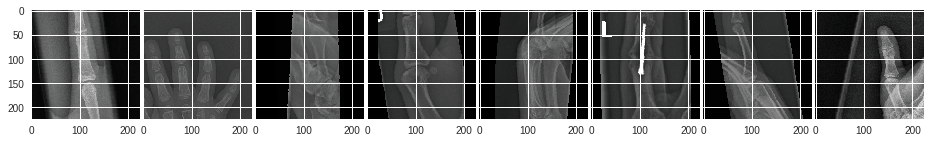

In [0]:
imgview, label = next(iter(transformed_valid_dl))
#print(img, label.size())
fig = plt.figure(1, figsize=(16, 8))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 8), axes_pad=0.05)  
for i in range(imgview.size()[0]):
  #print(img)
  ax = grid[i]
  print(imgview.shape)
  imshow(ax,imgview[i])
  print(label[i])

In [0]:
def get_count(layer_name,model_name):
  ct  = 0 
  layer_count ={}
  for name, child in model_name.named_children():
      for name2, params in child.named_parameters():
        layer_count[name2] = ct
        ct +=1
  return layer_count[layer_name]

def freeze_till(layer_name,model_name):
  ct  = 0 
  count = get_count(layer_name,model_name)
  
  for name, child in model_name.named_children():
    for name2, params in child.named_parameters():
      
      if ct > count :
          
            params.requires_grad = True
      else :
            params.requires_grad = False
      ct +=1

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

dataloaders = {"train": transformed_train_dl, "val": transformed_valid_dl}
dataset_sizes = {"train": len(transformed_train_dataset),"val":len(transformed_valid_dataset)}
print(dataset_sizes)

## This function just evaluate the loss / optimize  and returns model and the weight of the epoch which has highest accuracy
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        # Each epoch has a training and validation phase
        # In train phase they are settting 2 variable in model class - train() and schedular  = step()
        # In Validation phase setting the model class - eval()
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
            running_loss = 0.0
            running_corrects = 0
            # Iterate over data.# phase - train or validation
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                labels = labels.type(torch.cuda.LongTensor)
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    
                    #print(outputs.shape)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                #print(phase,preds,labels.data)
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            #print(preds[1:10],labels.data[1:10])
            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        #print()
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

{'train': 5106, 'val': 461}


In [0]:
# Load Pretrained model

#model_ft = models.resnet18(pretrained=True)
model_ft = models.densenet169(pretrained=True)

# Freeze specific layers of the model

freeze_till('transition2.conv.weight',model_ft)

# num_ftrs = model_ft.fc.in_features # fc for resnet
num_ftrs = model_ft.classifier.in_features
model_ft.classifier = nn.Linear(num_ftrs, 2)
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss(weight = torch.tensor([1, 1.05]).type(torch.cuda.FloatTensor))

/usr/local/lib/python3.6/dist-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /content/.torch/models/densenet169-b2777c0a.pth
100.0%


In [0]:
optimizer_ft = optim.Adam(list(filter(lambda p: p.requires_grad, model_ft.parameters())), lr = 1e-4, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=15)

Epoch 0/14
----------
train Loss: 0.5531 Acc: 0.7231
val Loss: 0.6085 Acc: 0.6985
Epoch 1/14
----------
train Loss: 0.4942 Acc: 0.7662
val Loss: 0.5464 Acc: 0.7354
Epoch 2/14
----------
train Loss: 0.4528 Acc: 0.7934
val Loss: 0.5596 Acc: 0.7267
Epoch 3/14
----------
train Loss: 0.4275 Acc: 0.8075
val Loss: 0.4965 Acc: 0.7939
Epoch 4/14
----------
train Loss: 0.4081 Acc: 0.8179
val Loss: 0.5179 Acc: 0.7809
Epoch 5/14
----------
train Loss: 0.3313 Acc: 0.8602
val Loss: 0.5051 Acc: 0.7939
Epoch 6/14
----------
train Loss: 0.3168 Acc: 0.8709
val Loss: 0.5136 Acc: 0.7939
Epoch 7/14
----------
train Loss: 0.2966 Acc: 0.8815
val Loss: 0.5203 Acc: 0.7570
Epoch 8/14
----------
train Loss: 0.2690 Acc: 0.8956
val Loss: 0.4788 Acc: 0.7918
Epoch 9/14
----------
train Loss: 0.2464 Acc: 0.8986
val Loss: 0.4973 Acc: 0.7852
Epoch 10/14
----------
train Loss: 0.2404 Acc: 0.9072
val Loss: 0.5044 Acc: 0.7701
Epoch 11/14
----------
train Loss: 0.2191 Acc: 0.9183
val Loss: 0.5317 Acc: 0.7896
Epoch 12/14
--

In [0]:
model_res = models.resnet18(pretrained=True)
num_ftrs = model_res.fc.in_features # fc for resnet
model_res.fc = nn.Linear(num_ftrs, 2)
model_res = model_res.to(device)
criterion = nn.CrossEntropyLoss()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /content/.torch/models/resnet18-5c106cde.pth
100.0%


In [0]:
optimizer_res = optim.Adam(list(filter(lambda p: p.requires_grad, model_res.parameters())),betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_res, step_size=5, gamma=0.1)
model_res = train_model(model_res, criterion, optimizer_res, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6657 Acc: 0.6271
val Loss: 0.6514 Acc: 0.6377
Epoch 1/24
----------
train Loss: 0.6378 Acc: 0.6344
val Loss: 0.6862 Acc: 0.5944
Epoch 2/24
----------
train Loss: 0.6135 Acc: 0.6635
val Loss: 0.8780 Acc: 0.5857
Epoch 3/24
----------
train Loss: 0.5919 Acc: 0.6804
val Loss: 0.7068 Acc: 0.5618
Epoch 4/24
----------
train Loss: 0.5793 Acc: 0.7004
val Loss: 0.6049 Acc: 0.6616
Epoch 5/24
----------
train Loss: 0.5470 Acc: 0.7248
val Loss: 0.5927 Acc: 0.6725
Epoch 6/24
----------
train Loss: 0.5288 Acc: 0.7380
val Loss: 0.5777 Acc: 0.7072
Epoch 7/24
----------
train Loss: 0.5180 Acc: 0.7446
val Loss: 0.5685 Acc: 0.6963
Epoch 8/24
----------
train Loss: 0.5065 Acc: 0.7571
val Loss: 0.5659 Acc: 0.7137
Epoch 9/24
----------
train Loss: 0.4971 Acc: 0.7656
val Loss: 0.5208 Acc: 0.7570
Epoch 10/24
----------
train Loss: 0.4869 Acc: 0.7662
val Loss: 0.5268 Acc: 0.7354
Epoch 11/24
----------
train Loss: 0.4742 Acc: 0.7775
val Loss: 0.5336 Acc: 0.7202
Epoch 12/24
--

In [0]:
'''learning_rates = [1e-4, 1e-3, 1e-2]
for lr in learning_rates:
    #optimizer_ft = optim.SGD(model_ft.classifier.parameters(),lr, momentum=0.9)
    optimizer_ft = optim.Adam(list(filter(lambda p: p.requires_grad, model_ft.parameters())), lr = lr, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
    model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=3)'''

'learning_rates = [1e-4, 1e-3, 1e-2]\nfor lr in learning_rates:\n    #optimizer_ft = optim.SGD(model_ft.classifier.parameters(),lr, momentum=0.9)\n    optimizer_ft = optim.Adam(list(filter(lambda p: p.requires_grad, model_ft.parameters())), lr = lr, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)\n    model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,\n                       num_epochs=3)'

In [0]:
!pip install torchsummary

In [0]:
from torchsummary import summary
summary(model_ft, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
       BatchNorm2d-5           [-1, 64, 56, 56]             128
              ReLU-6           [-1, 64, 56, 56]               0
            Conv2d-7          [-1, 128, 56, 56]           8,192
       BatchNorm2d-8          [-1, 128, 56, 56]             256
              ReLU-9          [-1, 128, 56, 56]               0
           Conv2d-10           [-1, 32, 56, 56]          36,864
      BatchNorm2d-11           [-1, 96, 56, 56]             192
             ReLU-12           [-1, 96, 56, 56]               0
           Conv2d-13          [-1, 128, 56, 56]          12,288
      BatchNorm2d-14          [-1, 128,

In [0]:
summary(model_res, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [0]:
model_ft.eval()
model_res.eval()
pred_list_dense = []
label_list_dense = []
#softmax_list = []
image_list_dense = []
pred_list_res = []

ct12 = 0 
for inputs1, labels1 in dataloaders['val']:
                ct12 += 1
                inputs1 = inputs1.to(device)
                labels1 = labels1.to(device)
                labels1 = labels1.type(torch.cuda.LongTensor)
                # zero the parameter gradients
                # optimizer.zero_grad()
                # forward
                # track history if only in train
                # with torch.set_grad_enabled(phase == 'train'):
                outputs1 = model_ft(inputs1)
                  
                    #print(outputs.shape)
                _, preds1 = torch.max(outputs1, 1)
                pred_list_dense.extend(preds1.cpu().numpy())
                label_list_dense.extend(labels1.data)
                #softmax_list.extend(softmax1(outputs1.cpu().detach().numpy(),axis =1))
                image_list_dense.extend(inputs1)
                outputs2 = model_res(inputs1)
                  
                    #print(outputs.shape)
                _, preds2 = torch.max(outputs2, 1)
                pred_list_res.extend(preds2.cpu().numpy())
                

In [0]:
Compare_result = pd.DataFrame(np.column_stack([label_list_dense,pred_list_dense,pred_list_res]),columns=['Actual','DenseBlock','ResNet'])

In [0]:
Compare_result.to_csv("Result_Compare.csv")

In [0]:
!ls

datalab  __MACOSX  XR_ELBOW_v1.1  XR_ELBOW_v1.1.zip


In [0]:
from google.colab import files
files.download('XR_ELBOW_v1.1/train_labeled_studies.csv')

In [0]:
!ls

datalab  __MACOSX  MURA-v1.1  MURA-v1.1.zip  Result_Compare.csv


In [0]:
Compare_result

,Actaul,DenseBlock,ResNet
0,1,0,1
1,1,1,1
2,1,0,1
3,0,0,0
4,0,1,0
5,0,0,0
6,1,1,1
7,0,1,1
8,1,1,1
9,0,1,1
